In [18]:
import re
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import DanishStemmer
nltk.download('stopwords')
nltk.download('punkt_tab', quiet=True)

stemmer = DanishStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bruger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# AFINN-Lexicon-dataframe

In [19]:
# Åbne Afinn.txt
AFINN_file = r"AFINN-da-32.txt"

# åbne filen som dataframe
afinn_dataframe = pd.read_csv(AFINN_file,sep='\t',header=None)

# kolonnenavne
afinn_dataframe.columns = ["word","score"]

# stemmer ordet
afinn_dataframe["stemmed word"] = [stemmer.stem(word) for word in afinn_dataframe["word"]]

# finder ordets sentiment
afinn_dataframe["sentiment"] = ["positive" if score > 0 else "negative" for score in afinn_dataframe["score"]]

print(afinn_dataframe.to_string())

                         word  score           stemmed word sentiment
0                  absorberet      1                 absorb  positive
1                   acceptere      1                 accept  positive
2                 accepterede      1                 accept  positive
3                  accepterer      1                 accept  positive
4                  accepteres      1                 accept  positive
5                  accepteret      1                 accept  positive
6                      advare     -2                  advar  negative
7                    advarede     -2                advared  negative
8                     advarer     -2                  advar  negative
9                     advaret     -2                  advar  negative
10                   advarsel     -3               advarsel  negative
11                  advarsler     -3                advarsl  negative
12                advarslerne     -3                advarsl  negative
13                  

# Preprocess speech

In [20]:
# Open speech
# speech_file = r"C:\Users\Bruger\Desktop\Uni\1. semester\Introduction to Intelligent Systems\Projektuge\Nytårstaler-statsminister\Statsminister 2025.txt"
# with open(speech_file) as speech:
#     speech = speech.read()

# Open stopwords_list:
stop_words_file = r"stopwords-dansk.txt"
with open(stop_words_file, encoding='utf-8') as stop_words_list:
    stop_words_list = stop_words_list.read().splitlines()
    

def preprocess_speech(speech,stopwords,stemmer):
    # fjerner puncutation 
    speech = re.sub("[,-:'*.?:;–\”]"," ",speech)

    # lowercase:
    speech = speech.lower()

    # Tokenize
    tokens = [word for word in word_tokenize(speech)]

    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # stemme
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# preprocess_speech(speech,stop_words_list,stemmer)


# Calculate sentiment score and arousal

## Code

In [21]:
def calculate_score(path):
    word_score_dict = dict(zip(afinn_dataframe["stemmed word"], afinn_dataframe["score"]))
    score_dict = {}

    score_dict["speech_name"] = []
    score_dict["speaker_name"] = []
    score_dict["year"] = []
    score_dict["number_of_tokens"] = []
    score_dict["sentiment_score"] = []
    score_dict["arousal_score"] = []
    score_dict["positive_words"] = []
    score_dict["negative_words"] = []

    for file in os.listdir(path):
        # info til hver tale
        sentiment_score = 0
        arousal_score = 0
        positive_words = 0
        negative_words = 0

        # path to the folder containing the file
        filename = os.path.join(path, file)

        # open specific speech
        with open(filename, encoding='utf-8') as speech:
            speech = speech.read()
        
        # process speech and find tokens:
        tokens = preprocess_speech(speech,stop_words_list,stemmer)
        
        # gennemgår alle tokens i den specifikke tale og ser om de er i AFINN-lexiconnet.
        for token in tokens:
            if token in word_score_dict:
                sentiment_score += word_score_dict[token]
                arousal_score += abs(word_score_dict[token])
                if word_score_dict[token] > 0:
                    positive_words += 1
                else:
                    negative_words += 1

        # finder speaker navn og year i den specifikke tale
        if "Margrethe" in file:
            speaker_name = "Margrethe"
            year = file.strip("Margrethe .txt")
        else:
            speaker_name = "Statsministeren"
            year = file.strip("Statsministeren .txt")
            
        # adder info hver tale
        score_dict["speech_name"].append(file)
        score_dict["speaker_name"].append(speaker_name)
        score_dict["year"].append(year)
        score_dict["number_of_tokens"].append(len(tokens))
        score_dict["sentiment_score"].append(sentiment_score/len(tokens))
        score_dict["arousal_score"].append(arousal_score/len(tokens))
        score_dict["positive_words"].append(positive_words/len(tokens))
        score_dict["negative_words"].append(negative_words/len(tokens))

    sentiment_analysis = pd.DataFrame(score_dict)
    return sentiment_analysis

## Margrethe

In [22]:
Margrethe_dataframe = calculate_score(r"Talerne\Margrethe")
Margrethe_dataframe

,speech_name,speaker_name,year,number_of_tokens,sentiment_score,arousal_score,positive_words,negative_words
0,Margrethe 1972.txt,Margrethe,1972,316,0.170886,0.500000,0.177215,0.091772
1,Margrethe 1973.txt,Margrethe,1973,308,0.185065,0.483766,0.162338,0.087662
2,Margrethe 1974.txt,Margrethe,1974,291,0.116838,0.584192,0.182131,0.127148
3,Margrethe 1975.txt,Margrethe,1975,381,0.293963,0.624672,0.199475,0.081365
4,Margrethe 1976.txt,Margrethe,1976,319,0.147335,0.667712,0.194357,0.131661
5,Margrethe 1977.txt,Margrethe,1977,334,0.047904,0.508982,0.149701,0.119760
6,Margrethe 1978.txt,Margrethe,1978,385,0.150649,0.623377,0.181818,0.114286
7,Margrethe 1979.txt,Margrethe,1979,323,0.080495,0.421053,0.123839,0.092879
8,Margrethe 1980.txt,Margrethe,1980,362,0.284530,0.588398,0.204420,0.080110
9,Margrethe 1981.txt,Margrethe,1981,321,0.152648,0.557632,0.190031,0.112150


## Statsministeren

In [23]:
Statsministeren_dataframe = calculate_score(r"Talerne\Statsministeren")
Statsministeren_dataframe

,speech_name,speaker_name,year,number_of_tokens,sentiment_score,arousal_score,positive_words,negative_words
0,Statsministeren 1973.txt,Statsministeren,1973,657,0.048706,0.432268,0.121766,0.103501
1,Statsministeren 1974.txt,Statsministeren,1974,742,0.053908,0.398922,0.123989,0.091644
2,Statsministeren 1976.txt,Statsministeren,1976,738,0.024390,0.476965,0.130081,0.115176
3,Statsministeren 1977.txt,Statsministeren,1977,662,-0.051360,0.441088,0.110272,0.122356
4,Statsministeren 1978.txt,Statsministeren,1978,780,-0.021795,0.452564,0.116667,0.119231
5,Statsministeren 1979.txt,Statsministeren,1979,697,-0.048780,0.378766,0.086083,0.109039
6,Statsministeren 1980.txt,Statsministeren,1980,576,0.032986,0.442708,0.140625,0.102431
7,Statsministeren 1981.txt,Statsministeren,1981,630,-0.025397,0.450794,0.119048,0.120635
8,Statsministeren 1982.txt,Statsministeren,1982,536,0.041045,0.395522,0.111940,0.093284
9,Statsministeren 1983.txt,Statsministeren,1983,562,0.169039,0.556940,0.199288,0.108541


# Plot data

## Code

### Per år

In [24]:
def plot_data_per_year(name_dataframe):
    figure, axis = plt.subplots(2, 2,figsize=(8, 8))
    figure.suptitle(name_dataframe["speaker_name"][0], fontsize = 13)

    #sentiment_score per year
    axis[0,0].plot(name_dataframe["year"],name_dataframe["sentiment_score"])
    axis[0,0].set_title("Sentiment score per year", fontsize = 12)
    axis[0,0].set_xlabel('Year',fontsize = 8)
    axis[0,0].tick_params(axis="x", labelsize=5, rotation=90)
    axis[0,0].set_ylabel('Score',fontsize = 8)

    # #arousal_score pr year
    axis[0,1].plot(name_dataframe["year"],name_dataframe["arousal_score"])
    axis[0,1].set_title("Arousal score per year", fontsize = 12)
    axis[0,1].set_xlabel('Year',fontsize = 8)
    axis[0,1].tick_params(axis="x", labelsize=5, rotation=90)
    axis[0,1].set_ylabel('Score',fontsize = 8)

    #Positive words per year
    axis[1,0].plot(name_dataframe["year"],name_dataframe["positive_words"])
    axis[1,0].set_title("Positive words per year", fontsize = 12)
    axis[1,0].set_xlabel('Year',fontsize = 8)
    axis[1,0].tick_params(axis="x", labelsize=5, rotation=90)
    axis[1,0].set_ylabel('Amount',fontsize = 8)

    # Negative words per year
    axis[1,1].plot(name_dataframe["year"],name_dataframe["negative_words"])
    axis[1,1].set_title("Negative words per year", fontsize = 12)
    axis[1,1].set_xlabel('Year',fontsize = 8)
    axis[1,1].tick_params(axis="x", labelsize=5, rotation=90)
    axis[1,1].set_ylabel('Amount',fontsize = 8)
    plt.tight_layout()

    return figure

In [25]:
# def plot_data(name_dataframe):
#     #Figure 1
#     fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#     fig1.suptitle(name_dataframe["speaker_name"][0], fontsize = 15)

#     #sentiment_score
#     ax1.plot(name_dataframe["year"],name_dataframe["sentiment_score"]) # kan også skrive "bar" i stedet for "plot" for at få det ud i bjælker
#     ax1.set_title("Sentiment score per year", fontsize = 12)
#     ax1.set_xlabel('Year')
#     ax1.set_ylabel('Score')


#     # #arousal_score
#     ax2.plot(name_dataframe["year"],name_dataframe["arousal_score"])
#     ax2.set_title("Arousal score per year", fontsize = 12)
#     ax2.set_xlabel('Year')
#     ax2.set_ylabel('Score')


#     #Figure 2
#     fig2, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#     fig2.suptitle(name_dataframe["speaker_name"][0], fontsize = 15)

#     #Positive words per year
#     ax1.plot(name_dataframe["year"],name_dataframe["positive_words"])
#     ax1.set_title("Positive words per year", fontsize = 12)
#     ax1.set_xlabel('Year')
#     ax1.set_ylabel('Amount')


#     # Negative words per year
#     ax2.plot(name_dataframe["year"],name_dataframe["negative_words"])
#     ax2.set_title("Negative words per year", fontsize = 12)
#     ax2.set_xlabel('Year')
#     ax2.set_ylabel('Amount')


#     return fig1,fig2

### Histogram

In [26]:
def plot_data_histogram(name_dataframe):
    figure, axis = plt.subplots(2, 2,figsize=(8, 8))
    figure.suptitle(f"{name_dataframe["speaker_name"][0]} - histogram", fontsize = 13)

    #sentiment_score
    axis[0,0].hist(name_dataframe["sentiment_score"])
    axis[0,0].set_title("Sentiment score", fontsize = 12)
    axis[0,0].set_xlabel('Score',fontsize = 8)
    axis[0,0].set_ylabel('Frequency',fontsize = 8)

    # #arousal_score
    axis[0,1].hist(name_dataframe["arousal_score"])
    axis[0,1].set_title("Arousal score", fontsize = 12)
    axis[0,1].set_xlabel('Score',fontsize = 8)
    axis[0,1].set_ylabel('Frequency',fontsize = 8)

    #Positive words
    axis[1,0].hist(name_dataframe["positive_words"])
    axis[1,0].set_title("Positive words", fontsize = 12)
    axis[1,0].set_xlabel('Amount',fontsize = 8)
    axis[1,0].set_ylabel('Frequency',fontsize = 8)

    # Negative words
    axis[1,1].hist(name_dataframe["negative_words"])
    axis[1,1].set_title("Negative words", fontsize = 12)
    axis[1,1].set_xlabel('Amount',fontsize = 8)
    axis[1,1].set_ylabel('Frequency',fontsize = 8)
    plt.tight_layout()

    return figure

## Margrethe

### Per år

Figure(800x800)


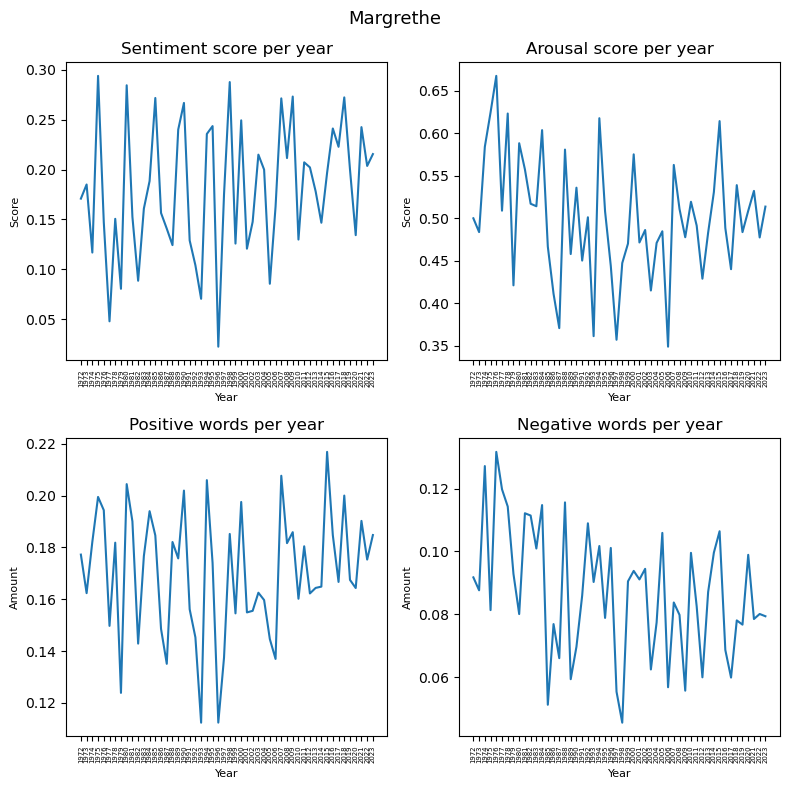

In [27]:
print(plot_data_per_year(Margrethe_dataframe))

### Histogram

Figure(800x800)


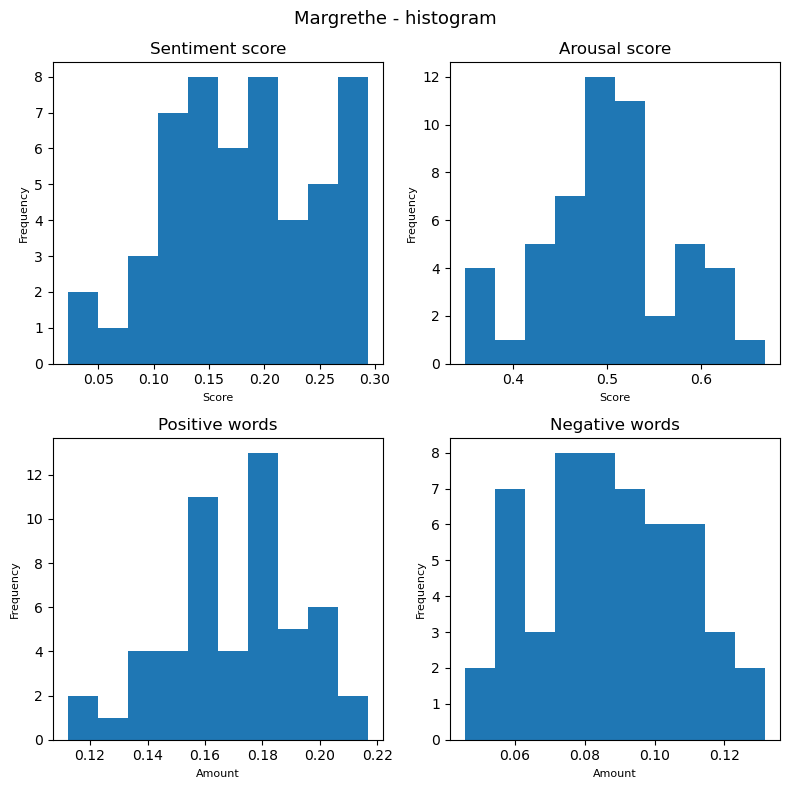

In [28]:
print(plot_data_histogram(Margrethe_dataframe))

In [29]:
# Margrethe_dataframe.hist(bins=8)

## Statsministeren

### Per år

Figure(800x800)


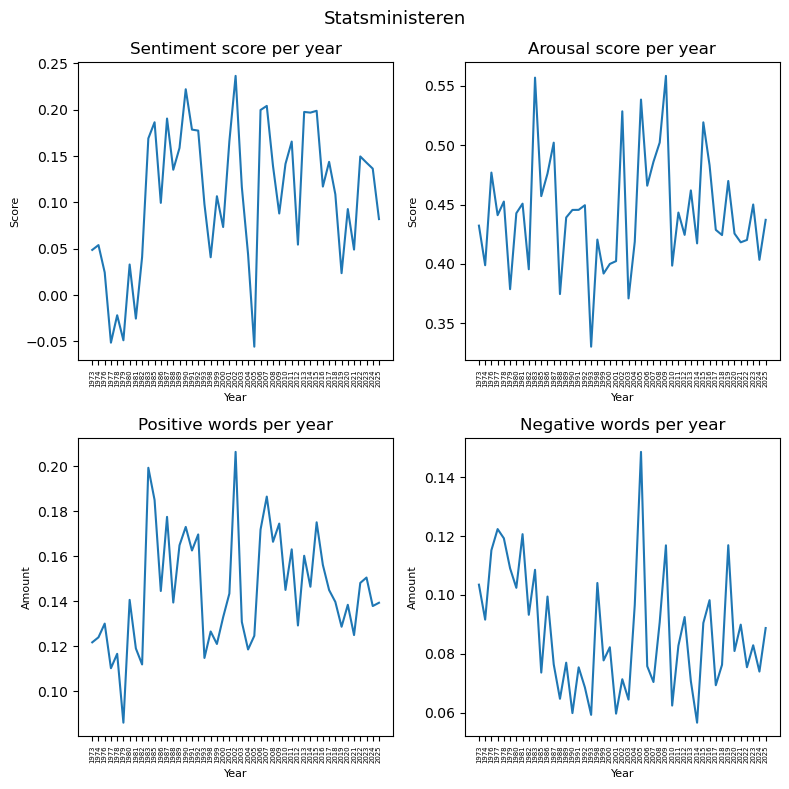

In [30]:
print(plot_data_per_year(Statsministeren_dataframe))

### Histogram

Figure(800x800)


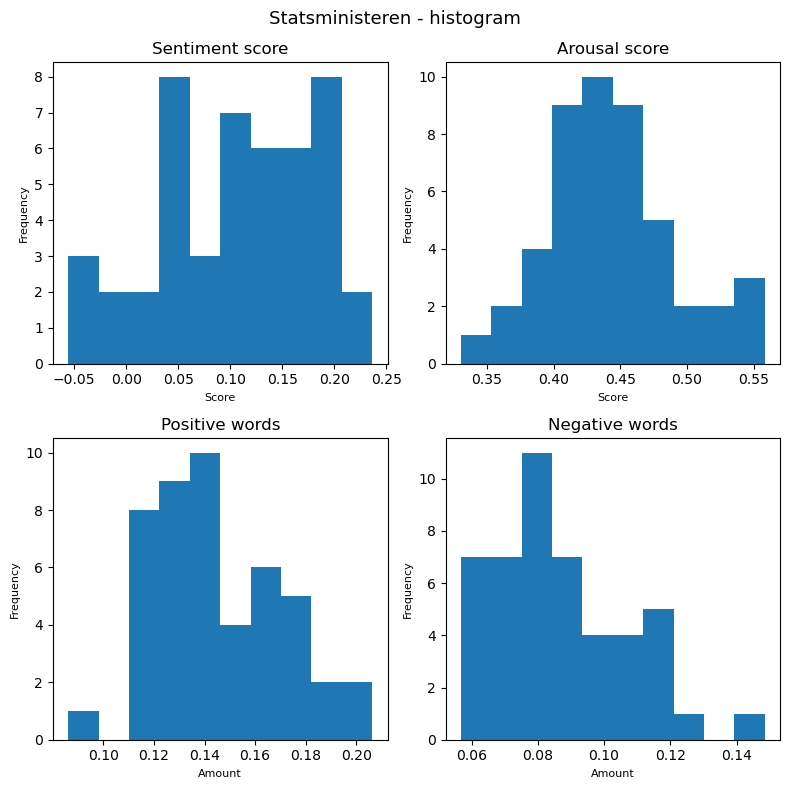

In [31]:
print(plot_data_histogram(Statsministeren_dataframe))

In [32]:
# figure, axis =  Statsministeren_dataframe.hist(bins=8)

## Sammenligne

### Per år

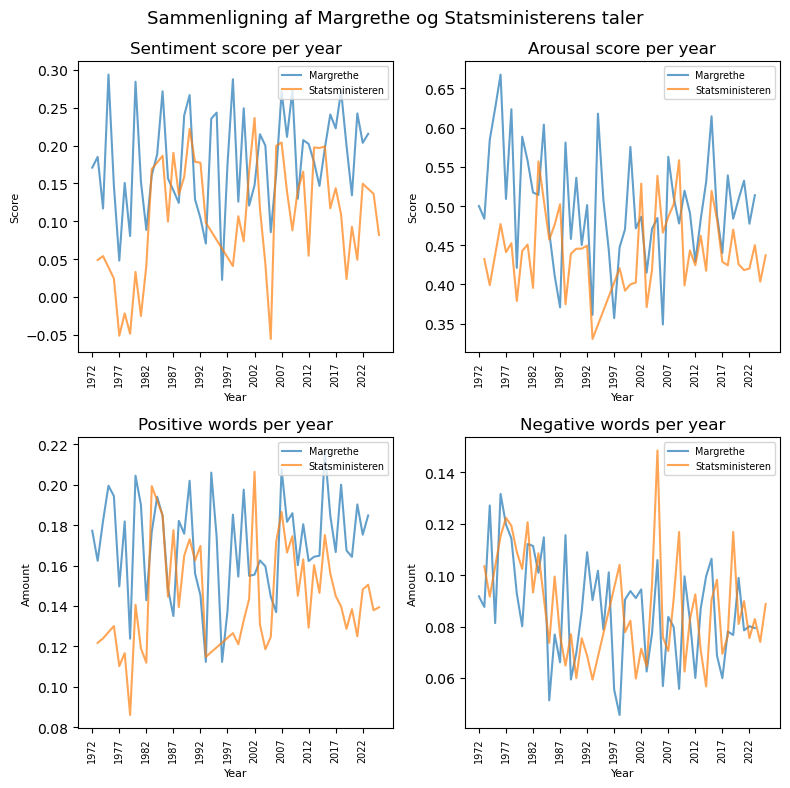

In [41]:
figure, axis = plt.subplots(2, 2,figsize=(8, 8))
figure.suptitle("Sammenligning af Margrethe og Statsministerens taler", fontsize = 13)

#sentiment_score per year
axis[0,0].plot(Margrethe_dataframe["year"],Margrethe_dataframe["sentiment_score"], alpha=0.7, label = "Margrethe")
axis[0,0].plot(Statsministeren_dataframe["year"],Statsministeren_dataframe["sentiment_score"], alpha=0.7, label = "Statsministeren")
axis[0,0].set_title("Sentiment score per year", fontsize = 12)
axis[0,0].set_xlabel('Year',fontsize = 8)
axis[0,0].set_xticks(Margrethe_dataframe["year"][::5])
axis[0,0].tick_params(axis="x", labelsize=7, rotation=90)
axis[0,0].set_ylabel('Score',fontsize = 8)
axis[0,0].legend(loc='upper right',fontsize = 'x-small')

# #arousal_score pr year
axis[0,1].plot(Margrethe_dataframe["year"],Margrethe_dataframe["arousal_score"], alpha=0.7, label = "Margrethe")
axis[0,1].plot(Statsministeren_dataframe["year"],Statsministeren_dataframe["arousal_score"], alpha=0.7, label = "Statsministeren")
axis[0,1].set_title("Arousal score per year", fontsize = 12)
axis[0,1].set_xlabel('Year',fontsize = 8)
axis[0,1].set_xticks(Margrethe_dataframe["year"][::5])
axis[0,1].tick_params(axis="x", labelsize=7, rotation=90)
axis[0,1].set_ylabel('Score',fontsize = 8)
axis[0,1].legend(loc='upper right',fontsize = 'x-small')

#Positive words per year
axis[1,0].plot(Margrethe_dataframe["year"],Margrethe_dataframe["positive_words"], alpha=0.7, label = "Margrethe")
axis[1,0].plot(Statsministeren_dataframe["year"],Statsministeren_dataframe["positive_words"], alpha=0.7, label = "Statsministeren")
axis[1,0].set_title("Positive words per year", fontsize = 12)
axis[1,0].set_xlabel('Year',fontsize = 8)
axis[1,0].set_xticks(Margrethe_dataframe["year"][::5])
axis[1,0].tick_params(axis="x", labelsize=7, rotation=90)
axis[1,0].set_ylabel('Amount',fontsize = 8)
axis[1,0].legend(loc='upper right',fontsize = 'x-small')


# Negative words per year
axis[1,1].plot(Margrethe_dataframe["year"],Margrethe_dataframe["negative_words"], alpha=0.7, label = "Margrethe")
axis[1,1].plot(Statsministeren_dataframe["year"],Statsministeren_dataframe["negative_words"], alpha=0.7, label = "Statsministeren")
axis[1,1].set_title("Negative words per year", fontsize = 12)
axis[1,1].set_xlabel('Year',fontsize = 8)
axis[1,1].set_xticks(Margrethe_dataframe["year"][::5])
axis[1,1].tick_params(axis="x", labelsize=7, rotation=90)
axis[1,1].set_ylabel('Amount',fontsize = 8)
axis[1,1].legend(loc='upper right',fontsize = 'x-small')
plt.tight_layout()

### Histogrammer

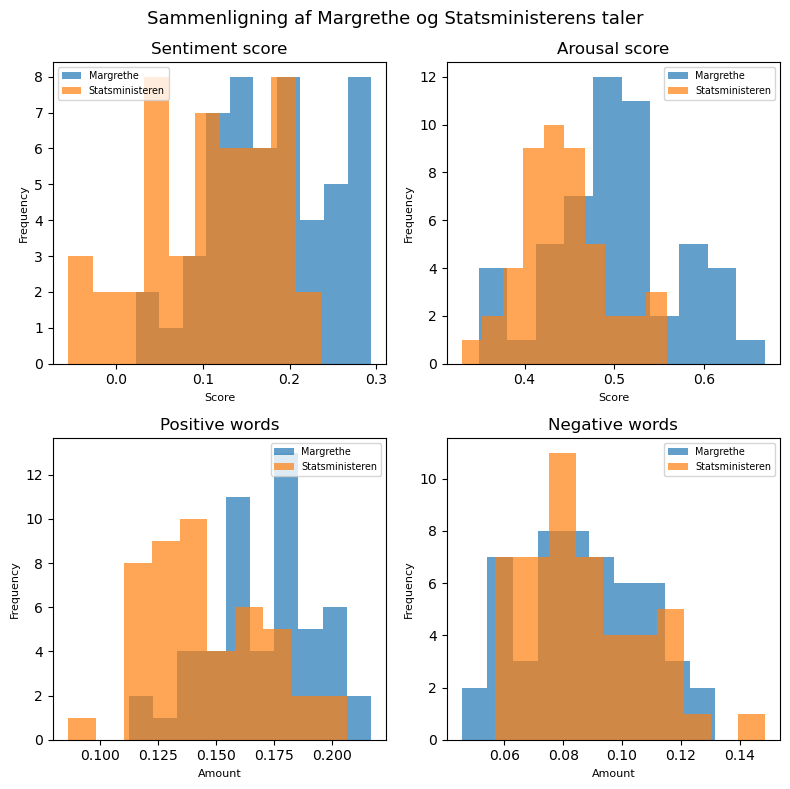

In [34]:
figure, axis = plt.subplots(2, 2,figsize=(8, 8))
figure.suptitle("Sammenligning af Margrethe og Statsministerens taler", fontsize = 13)

#sentiment_score
axis[0,0].hist(Margrethe_dataframe["sentiment_score"], alpha=0.7, label = "Margrethe")
axis[0,0].hist(Statsministeren_dataframe["sentiment_score"], alpha=0.7, label = "Statsministeren")
axis[0,0].set_title("Sentiment score", fontsize = 12)
axis[0,0].set_xlabel('Score',fontsize = 8)
axis[0,0].set_ylabel('Frequency',fontsize = 8)
axis[0,0].legend(loc='upper left',fontsize = 'x-small')


# #arousal_score
axis[0,1].hist(Margrethe_dataframe["arousal_score"], alpha=0.7, label = "Margrethe")
axis[0,1].hist(Statsministeren_dataframe["arousal_score"], alpha=0.7, label = "Statsministeren")
axis[0,1].set_title("Arousal score", fontsize = 12)
axis[0,1].set_xlabel('Score',fontsize = 8)
axis[0,1].set_ylabel('Frequency',fontsize = 8)
axis[0,1].legend(loc='upper right',fontsize = 'x-small')

#Positive words
axis[1,0].hist(Margrethe_dataframe["positive_words"], alpha=0.7, label = "Margrethe")
axis[1,0].hist(Statsministeren_dataframe["positive_words"], alpha=0.7, label = "Statsministeren")
axis[1,0].set_title("Positive words", fontsize = 12)
axis[1,0].set_xlabel('Amount',fontsize = 8)
axis[1,0].set_ylabel('Frequency',fontsize = 8)
axis[1,0].legend(loc='upper right',fontsize = 'x-small')


# Negative words
axis[1,1].hist(Margrethe_dataframe["negative_words"], alpha=0.7, label = "Margrethe")
axis[1,1].hist(Statsministeren_dataframe["negative_words"], alpha=0.7, label = "Statsministeren")
axis[1,1].set_title("Negative words", fontsize = 12)
axis[1,1].set_xlabel('Amount',fontsize = 8)
axis[1,1].set_ylabel('Frequency',fontsize = 8)
axis[1,1].legend(loc='upper right',fontsize = 'x-small')
plt.tight_layout()